In [2]:
# Importing required libraries.
import numpy as np
import pandas as pd  
pd.options.display.max_columns = 31

from matplotlib import pyplot as plt                    
import seaborn as  sns 

from sklearn.preprocessing import StandardScaler        
from sklearn.model_selection import train_test_split

print('All imports done')

All imports done


In [3]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/DataSets/creditcardfraud_ds.csv")  
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Time in this case is an unnecessary factor
data.drop(['Time'] , axis= 1 , inplace= True) 
data.shape 

(284807, 30)

In [6]:
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
data.shape

(275663, 30)

In [7]:
# checking whether there are any empty cells in data
data.isnull().values.any()

False

Text(0.5, 1.0, 'Class Distribution')

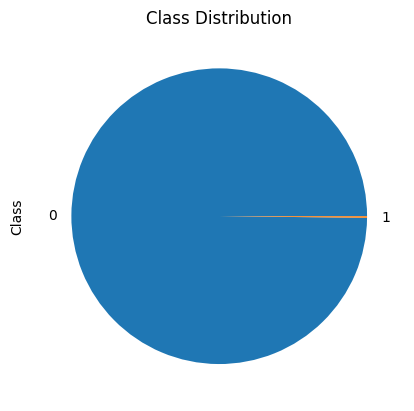

In [18]:
# plotting a pie chart showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind='pie')
plt.title('Class Distribution')

From the above bar graph , We can conclude that dataset is highly imbalanced.

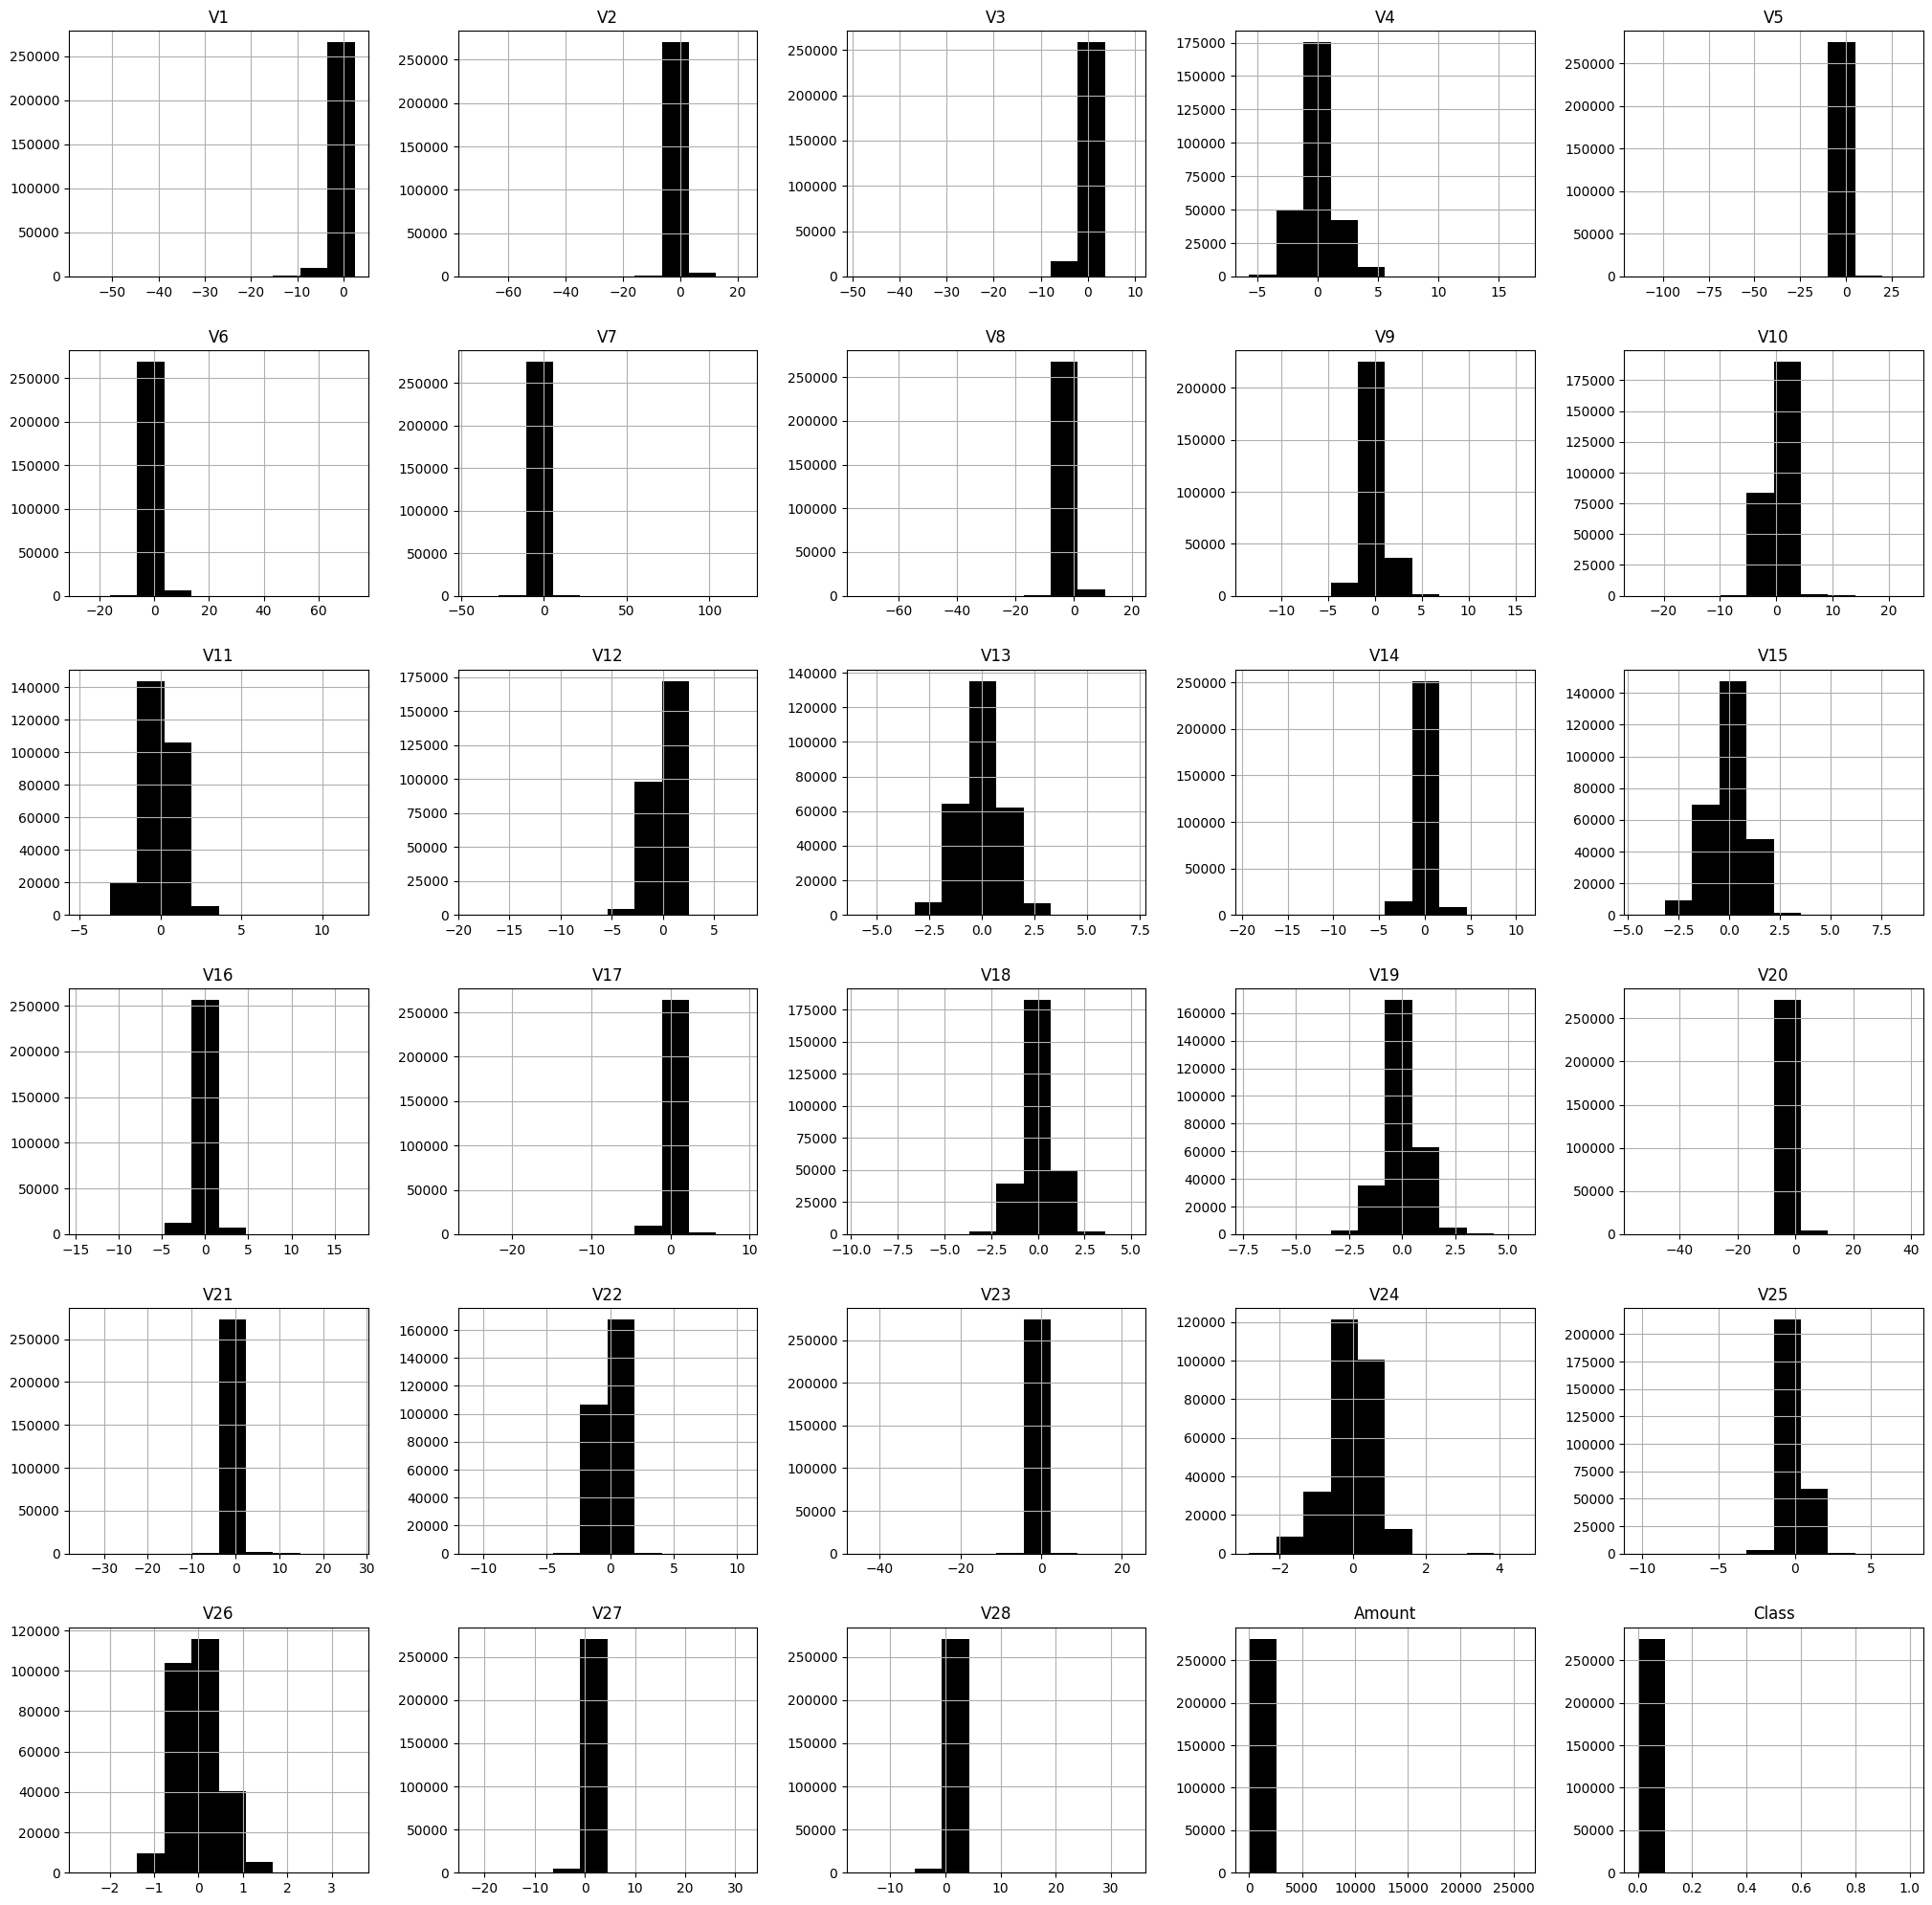

In [9]:
# plots the histograms of the each feature.
data.hist(figsize= (25,25) , color="black")
plt.show()

<AxesSubplot: title={'center': 'Correlation Matrix'}>

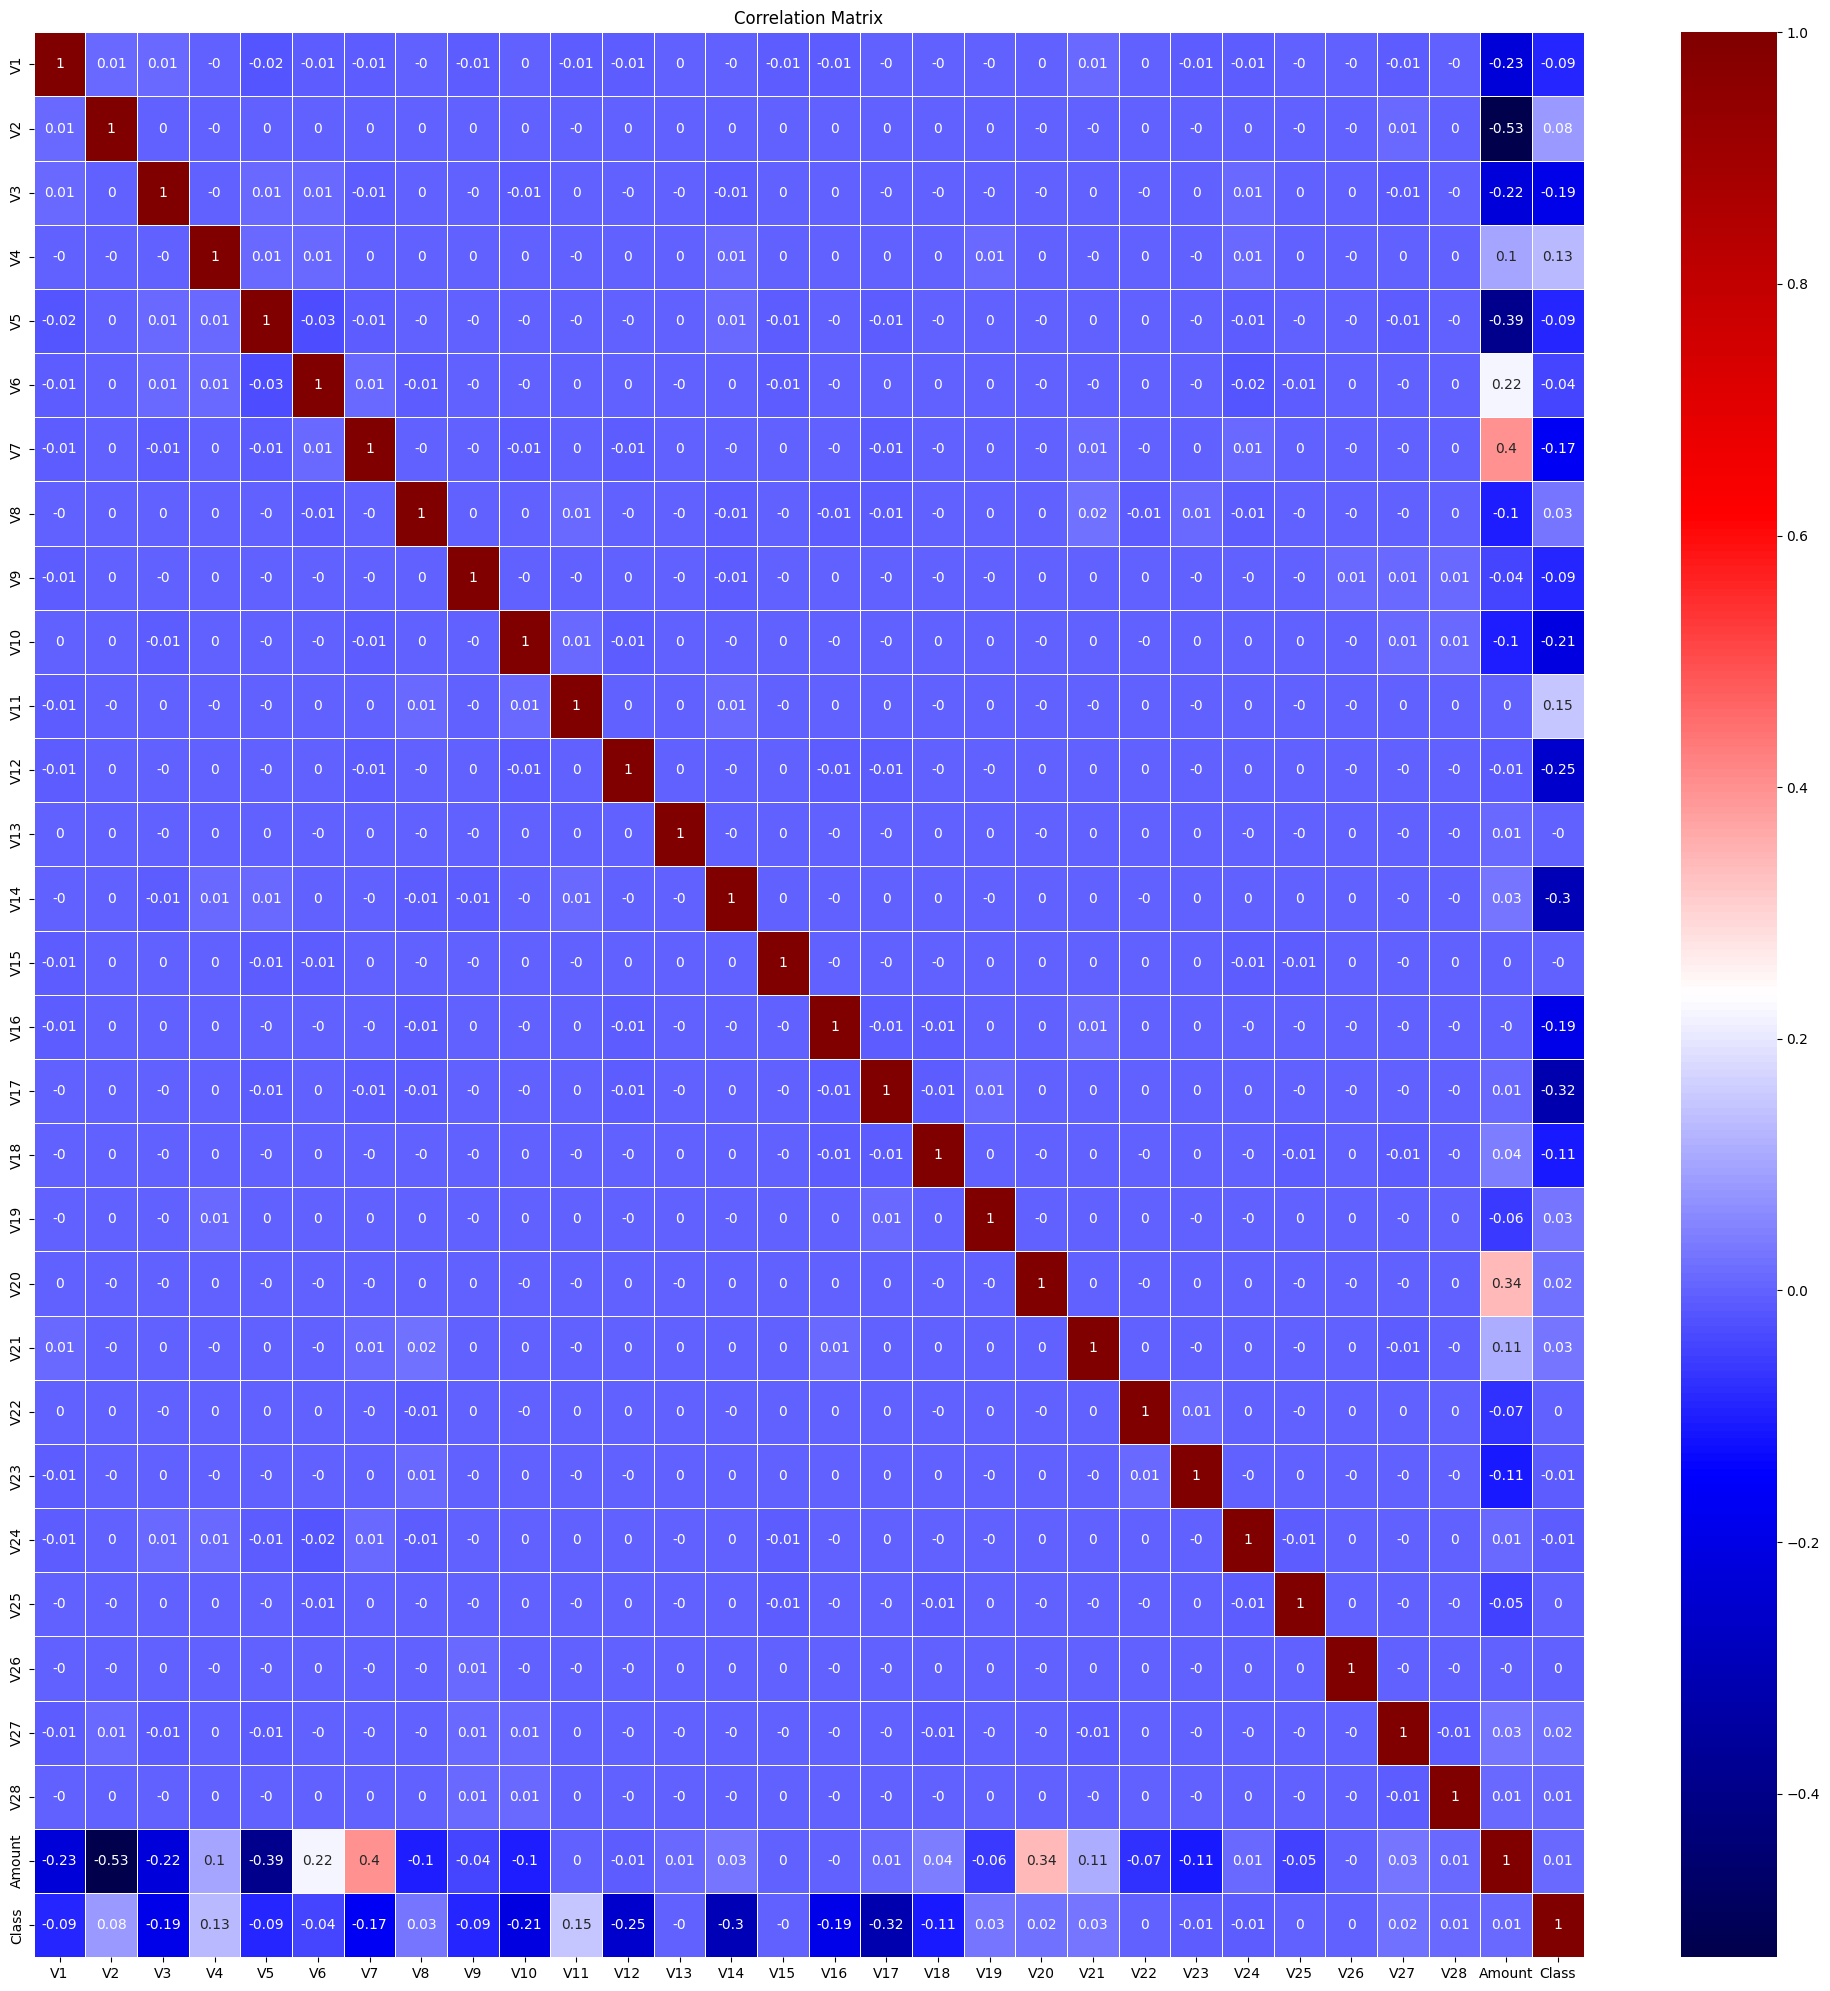

In [10]:
# Plotting the Correlation Matrix
fig = plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(data.corr().round(2) , linewidths= .5 , annot= True , cmap= plt.get_cmap('seismic'))

As there are no highly correlated features , so I will not be deleting any features

In [11]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = count_classes[0] 
fraud = count_classes[1]
outlier_fraction = fraud / normal

print('Number of normal transactions are :' , normal)
print('Number of fraud transactions are :' , fraud)
print('Total number of transactions are :' , normal + fraud )
print('Outlier Fraction :' , outlier_fraction)

Number of normal transactions are : 275190
Number of fraud transactions are : 473
Total number of transactions are : 275663
Outlier Fraction : 0.001718812456847996


In [12]:
# Splitting the dataset into X (input) and Y(output) . 
X = data.drop(['Class'] , axis = 1)
Y = data['Class']

X = StandardScaler().fit_transform(X)
[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , train_size= 0.8 , random_state= 4)
[(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)]

[((220530, 29), (220530,)), ((55133, 29), (55133,))]

In [14]:
pd.DataFrame(x_train).to_csv('X_train.csv' , index= False)
pd.DataFrame(y_train).to_csv('Y_train.csv' , index= False)
pd.DataFrame(x_test).to_csv('X_test.csv' , index= False)
pd.DataFrame(y_test).to_csv('Y_test.csv' , index= False)
print('Exported Successfully')

Exported Successfully
